In [7]:
import pandas as pd
import ast
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer

In [171]:
def join_reviews(data, isPreprocessed=True):
    if (isPreprocessed):
        review_text = []
        reviews = (data['review'].apply(ast.literal_eval))
        review_strings = reviews.apply(' '.join)
        review_strings.apply(review_text.append)
    
    return review_text

def graph_word_cloud(data, isPreprocessed=True):
    if (isPreprocessed):
        reviews = (data['review'].apply(ast.literal_eval))
        review_strings = reviews.apply(' '.join)
        review_text = ' '.join(review_strings)
    else:
        review_text = data['review'].str.cat(sep=' ')
        
    word_cloud = WordCloud(width=1600, height=800, collocations=False).generate(review_text)
    plt.figure(figsize=(20,20))
    plt.imshow(word_cloud)
    plt.axis("off")
    plt.show()

In [3]:
data = pd.read_csv('data/review_data.csv')
preprocessed_data = pd.read_csv('data/preprocessed_review_data.csv')

In [4]:
# data exploration
print("Columns: {0}\n".format(preprocessed_data.columns.values))
print("Total reviews: {0}\n".format(preprocessed_data.shape[0]))
print("Was recommended:\n{0}".format(preprocessed_data['voted_up'].value_counts()))

Columns: ['steam_id' 'review' 'timestamp_created' 'voted_up']

Total reviews: 20000

Was recommended:
True     19014
False      986
Name: voted_up, dtype: int64


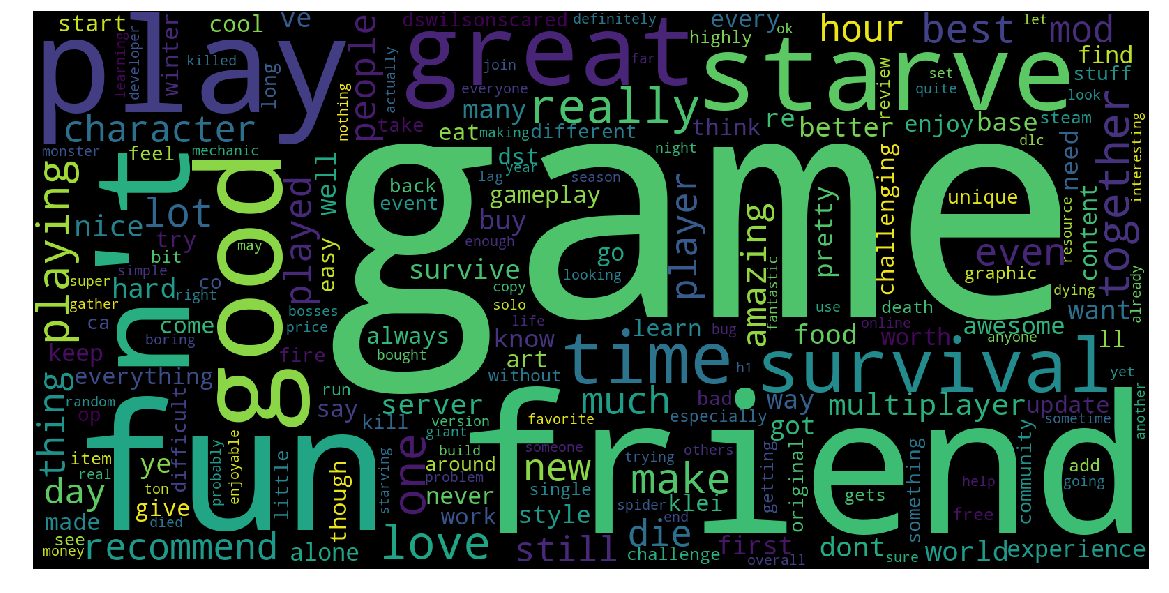

In [5]:
# wordcloud with preprocessing
graph_word_cloud(preprocessed_data)

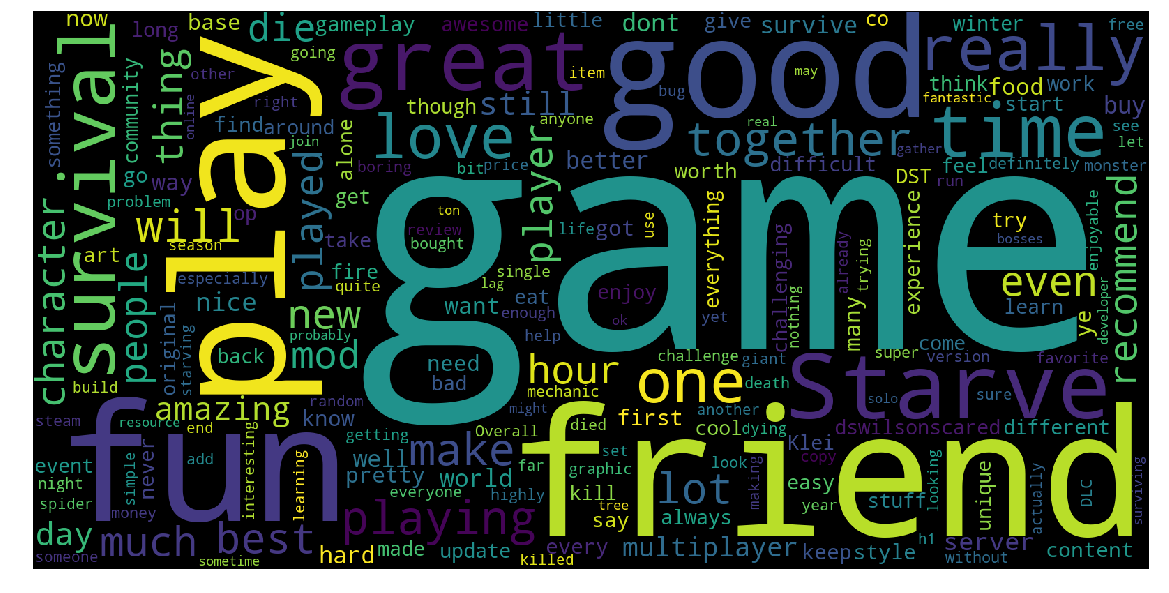

In [6]:
# wordcloud without preprocessing
graph_word_cloud(data, isPreprocessed=False)

In [179]:
characters = {'wilson': 0, 'willow': 1, 'wolfgang': 2, 'wendy': 3, 
              'wx': 4, 'wickerbottom': 5, 'woodie': 6, 'wes': 7, 
              'maxwell': 8, 'wigfrid': 9, 'webber': 10, 'warly': 11, 
              'wormwood': 12, 'winona': 13, 'wortox': 14, 'wurt': 15,}

corpus = join_reviews(preprocessed_data)

vectorizer = TfidfVectorizer(vocabulary=characters)
X = vectorizer.fit_transform(corpus)

feature_names = vectorizer.get_feature_names()
inverse_document_frequency = vectorizer.idf_

tf_idf_results = dict(zip(feature_names, inverse_document_frequency))
display(tf_idf_results)

{'wilson': 6.760402824894637,
 'willow': 6.298367365298079,
 'wolfgang': 7.959098572119729,
 'wendy': 7.4378016484864435,
 'wx': 8.19548735018396,
 'wickerbottom': 7.959098572119729,
 'woodie': 7.4378016484864435,
 'wes': 6.572804210999839,
 'maxwell': 7.76804333535702,
 'wigfrid': 7.6077006852818405,
 'webber': 6.729150281390533,
 'warly': 9.51724319016628,
 'wormwood': 8.264480221670912,
 'winona': 8.70631297394995,
 'wortox': 8.013165793390005,
 'wurt': 8.957627402230855}